<a href="https://colab.research.google.com/github/DomingosN/Ciencia-da-dados-aplicada-as-Organiza-es-/blob/master/KMeans_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Componentes Principais

Neste material vamos estudar um pouco a análise de componentes principais e depois vamos aplicar a técnica na base whisky.
Este material foi adaptado o tutorial de Jake Van der Plas que você pode encontra neste [link](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) em muitos trechos foi feita a tradução e ajuste dos texto às nossas aulas, cabendo aqui explicar não iremos citá-lo diretamente por simpliciadade. 

### Importando as bibliotecas

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

Até agora, alguns modelos de aprendizado supervisionado em particular aqueles que estimam rótulos com base em dados de treinamento rotulados. Aqui vamos examinar dois estimadores não supervisionados, que podem destacar aspectos interessantes dos dados sem referência a rótulos conhecidos. São eles a PCA e o KMeans

Primeiro avmos explorar o que talvez seja um dos algoritmos não supervisionados mais amplamente utilizados, a análise de componentes principais (PCA). O PCA é fundamentalmente um algoritmo de redução de dimensionalidade, mas também pode ser útil como uma ferramenta para visualização, filtragem de ruído, extração e engenharia de atributos e muito mais. Após uma breve discussão conceitual do algoritmo PCA, veremos alguns exemplos dessas aplicações adicionais.

Introdução à análise de componentes principais
A análise de componentes principais é um método não supervisionado rápido e flexível para redução de dimensionalidade nos dados, que pode também ser visto brevemente nesta [Introdução ao Scikit Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html). 
Seu comportamento é mais fácil de visualizar, observando um conjunto de dados bidimensional. Considere os 200 pontos a seguir:

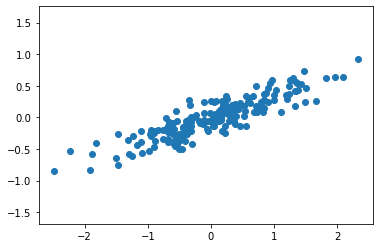

In [0]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Você pode perceber visualmente que existe uma relação quase linear entre as variáveis x e y. Isso lembra os dados de regressão linear, mas a configuração do problema aqui é um pouco diferente: em vez de tentar prever os valores de y a partir dos valores de x, o problema de aprendizado não supervisionado tenta aprender sobre a relação entre os valores x e y.

Na análise de componentes principais, esse relacionamento é quantificado encontrando uma lista dos eixos principais nos dados e usando esses eixos para descrever o conjunto de dados. Usando o estimador PCA do Scikit-Learn, podemos calcular isso da seguinte maneira:

In [0]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

O ajuste (fit) aprende algumas quantidades dos dados, principalmente os "componentes" e "variação explicada":

In [0]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [0]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Para ver o que esses números significam, vamos visualizá-los como vetores sobre os dados de entrada, usando os "componentes" para definir a direção do vetor e a "variação explicada" para definir o comprimento ao quadrado do vetor:

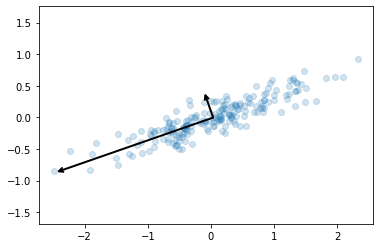

In [0]:
# função para desenahr os vetores dos componetes principais
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Gráfico dos dados
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Esses vetores representam os principais eixos dos dados e o comprimento do vetor é uma indicação de quão "importante" esse eixo é na descrição da distribuição dos dados - mais precisamente, é uma medida da variação dos dados quando projetados nesse eixo. A projeção de cada ponto de dados nos eixos principais são os "componentes principais" dos dados.

Se traçarmos esses componentes principais ao lado dos dados originais, veremos os gráficos mostrados aqui:

[(-3.0, 3.1),
 Text(0, 0.5, 'componente 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'componente 1'),
 Text(0.5, 1.0, 'Componetes Principais')]

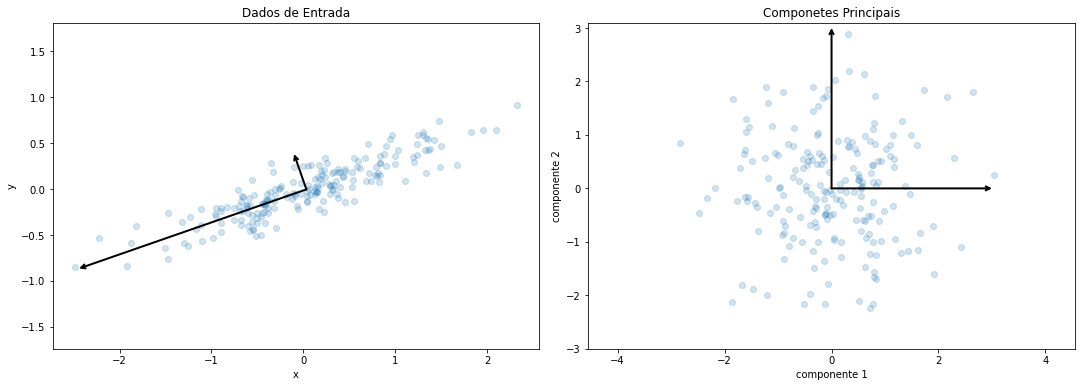

In [0]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Gráfco dos dados
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='Dados de Entrada')

# Gráfico das Componente Principais
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='componente 1', ylabel='componente 2',
          title='Componetes Principais',
          xlim=(-5, 5), ylim=(-3, 3.1))

A ideia geral da PCA é de encontrar eixos principais e apresnetar as varíaveis x e y como se fossem projeções desses eixos fazendo algo parecido com que vemos nessa ![figura](http://www.alfaconnection.pro.br/images/VET020301a.gif)  
Desre modo as duas componetes são como se fossem os valores projetados (como uma sombra nesse eixo) Para ter uam idéia de como funcioan quando temos muitas dimensões seria mais ou menos o seguinte:


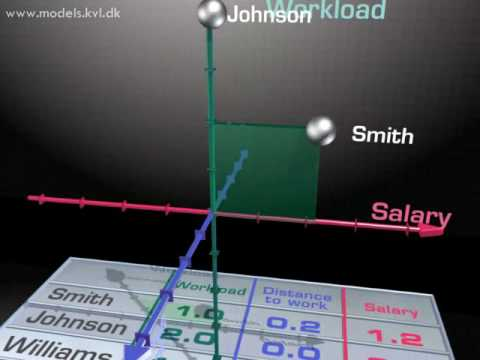

In [0]:
from IPython.display import YouTubeVideo
# View animations of PCA modeling material elaborado por  Ricardo Gherardi Hein
YouTubeVideo('4pnQd6jnCWk')

In [0]:
## Vamos ver como a PCA nos ajuda a trabalahr com o dataset whisky

In [0]:
whisky = pd.read_csv('whisky.csv')

In [0]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960


In [0]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', 'Latitude', 'Longitude'],
      dtype='object')

In [0]:
data = whisky.drop(['RowID', 'Distillery', 'Postcode', 'Latitude', 'Longitude'], axis=1)

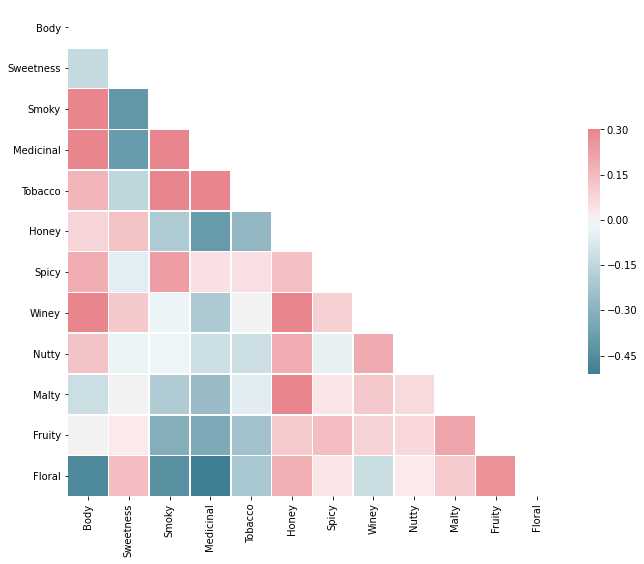

In [0]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.components_)

[[ 0.36119005 -0.20298238  0.47794419  0.57527678  0.09173306 -0.22090804
   0.05811101 -0.03745608 -0.0476641  -0.12781608 -0.20235755 -0.38394443]
 [ 0.49130643  0.04659634  0.06874216 -0.16079484 -0.02004776  0.41799491
   0.1754831   0.63964979  0.26036122  0.10296202  0.12374977 -0.13074914]]


In [0]:
comp = pd.DataFrame(pca.components_, columns=data.columns, index=['Componente 1', 'Componente 2'])

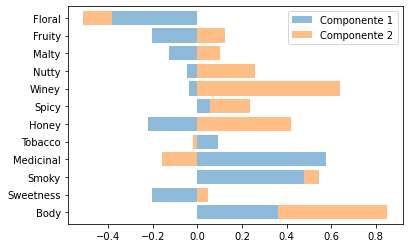

<Figure size 1440x1440 with 0 Axes>

In [0]:
ax = comp.T.plot(kind='barh', alpha=0.5, width=0.8, stacked=True)
plt.figure(figsize=(20,20))
plt.show()

In [0]:
print(pca.explained_variance_ratio_)

[0.30110979 0.19217886]


A Variância Explicada é um número, calculado objetivamente a partir dos dados observados e dos valores que o modelo em questão prediria, para indicar quão válido (quão próximo dos valores reais) o modelo proposto vem a ser. Via de regra, modelos mais complexos tem mais (e portanto melhor) variância explicada, mas em compensação são mais difíceis de utilizar para chegar a conclusões práticas.

In [0]:
X = pca.fit_transform(data)

In [0]:
data['PCA1']=X[:,0]
data['PCA2']=X[:,1]

Text(0, 0.5, 'Compnente 2')

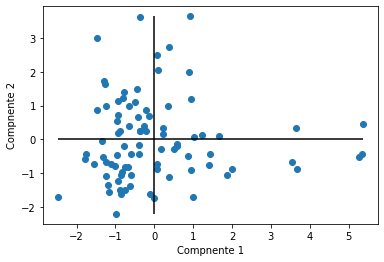

In [0]:
plt.scatter(data.PCA1,data.PCA2)
plt.hlines(0,data.PCA1.min(),data.PCA1.max())
plt.vlines(0,data.PCA2.min(),data.PCA2.max())
plt.xlabel('Compnente 1')
plt.ylabel('Compnente 2')

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
data['Cluster']= kmeans.predict(data)

In [0]:
data.columns

Index(['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy',
       'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral', 'PCA1', 'PCA2',
       'Cluster'],
      dtype='object')

<Figure size 1080x1080 with 0 Axes>

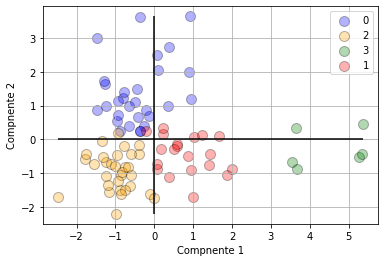

In [0]:
plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
color = ['blue', 'orange', 'green', 'red']
for i, cl in enumerate(data.Cluster.unique()):
    x = data[data['Cluster']==cl]['PCA1']
    y = data[data['Cluster']==cl]['PCA2']
    ax.scatter(x, y, c=color[i], s=100, label=str(cl),alpha=0.3, edgecolors='k')

ax.legend()
ax.grid(True)
ax.hlines(0,data.PCA1.min(),data.PCA1.max())
ax.vlines(0,data.PCA2.min(),data.PCA2.max())
ax.set_xlabel('Compnente 1')
ax.set_ylabel('Compnente 2')
plt.show()

In [0]:
comp

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Componente 1,0.361190,-0.202982,0.477944,0.575277,0.091733,-0.220908,0.058111,-0.037456,-0.047664,-0.127816,-0.202358,-0.383944
Componente 2,0.491306,0.046596,0.068742,-0.160795,-0.020048,0.417995,0.175483,0.639650,0.260361,0.102962,0.123750,-0.130749


In [0]:
gd = data.groupby(['Cluster']).mean()[['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy',
                                      'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']]

In [0]:
gd.loc[0].values

array([2.65517241, 2.4137931 , 1.4137931 , 0.06896552, 0.03448276,
       1.86206897, 1.65517241, 1.79310345, 1.89655172, 2.03448276,
       2.10344828, 1.75862069])

In [0]:
gd.columns

Index(['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy',
       'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral'],
      dtype='object')

In [0]:
import plotly.graph_objects as go

categories = gd.columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=gd.loc[0].values,
      theta=categories,
      #fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=gd.loc[1].values,
      theta=categories,
      #fill='toself',
      name='Cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=gd.loc[2].values,
      theta=categories,
      #fill='toself',
      name='Cluster 3'
))
fig.add_trace(go.Scatterpolar(
      r=gd.loc[3].values,
      theta=categories,
      #fill='toself',
      name='Cluster 4'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 4]
    )),
  showlegend=True
)

fig.show()

In [0]:
gd2 = data.groupby(['Cluster']).mean()

In [0]:
gd2.loc[0]['PCA1']

-0.439513366977017

<Figure size 1080x1080 with 0 Axes>

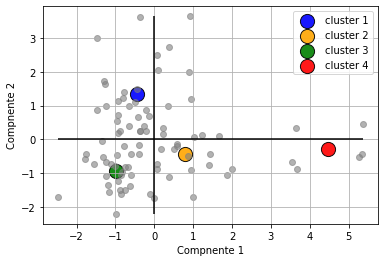

In [0]:
plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
color = ['blue', 'orange', 'green', 'red']
for i in range(len(gd2)):
    x = gd2.loc[i]['PCA1']
    y = gd2.loc[i]['PCA2']
    ax.scatter(x, y, c=color[i], s=200, label='cluster '+str(i+1),alpha=0.9, edgecolors='k')

ax.scatter(data.PCA1,data.PCA2, color='gray', alpha =0.6)

ax.legend()
ax.grid(True)
ax.hlines(0,data.PCA1.min(),data.PCA1.max())
ax.vlines(0,data.PCA2.min(),data.PCA2.max())
ax.set_xlabel('Compnente 1')
ax.set_ylabel('Compnente 2')
plt.show()

In [0]:
comp

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Componente 1,0.361190,-0.202982,0.477944,0.575277,0.091733,-0.220908,0.058111,-0.037456,-0.047664,-0.127816,-0.202358,-0.383944
Componente 2,0.491306,0.046596,0.068742,-0.160795,-0.020048,0.417995,0.175483,0.639650,0.260361,0.102962,0.123750,-0.130749


In [0]:
print(comp.loc['Componente 1'].max())
print(comp.loc['Componente 1'].min())

0.575276783847503
-0.383944430573393


In [0]:
print(comp.loc['Componente 2'].max())
print(comp.loc['Componente 2'].min())

0.6396497903569636
-0.16079483872662942
